In [1]:
import envelope
import numpy as np

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Fs = 10
N = 500
trans_info = [[{'coeff': 1.0, 'amps': 5 * np.array([-0.0154, -0.011, -0.005414]), 'freqs': [6.48e-3, 5.622e-3, 3.7e-3]},
               {'coeff': 0.01, 'amps': 5 * np.array([0.01237, -0.005816, -0.03928]), 'freqs': [0.01758, 0.005925, 0.002652]}],
              [{'coeff': -0.01, 'amps': 5 * np.array([-0.01568, -0.01486, -0.0064]), 'freqs': [0.00737, 0.0072, -0.0039]},
               {'coeff': 1.0, 'amps': 5 * np.array([-0.0154, -0.011, -0.005414]), 'freqs': [6.48e-3, 5.622e-3, 3.7e-3]}]]
A = envelope.flattop(t0=5.,len=10.,amp=1.,w=1.)
B = envelope.flattop(t0=15.,len=30.,amp=0.8,w=1.)
time = np.arange(N) / Fs  # (ns) 
freq = np.fft.fftfreq(N, d=1/Fs) # (GHz)
initial_state = np.hstack((A(time).astype('float32'),B(time).astype('float32'))) 

<ipython-input-2-20ba2ee0f664>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  initial_state = np.hstack((A(time).astype('float32'),B(time).astype('float32')))


In [3]:
initial_state.shape

(1000,)

In [4]:
import matplotlib.pyplot as plt

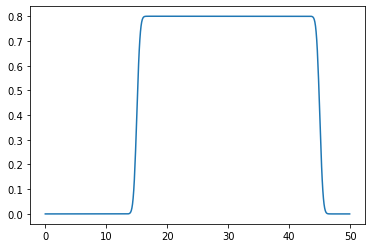

In [5]:
fig, ax =plt.subplots()
ax.plot(time,initial_state[500:])

In [18]:
import gymnasium as gym
import gym_examples
import core
from copy import deepcopy

In [19]:
env = gym.make(id='gym_examples/Quantum', Fs=Fs, N=N, initial_state=initial_state,trans_info=trans_info)

In [20]:
ac = core.MLPActorCritic(env.observation_space, env.action_space)
ac_targ = deepcopy(ac)

In [21]:
ac.state_dict

<bound method Module.state_dict of MLPActorCritic(
  (pi): MLPActor(
    (pi): Sequential(
      (0): Linear(in_features=1000, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=1000, bias=True)
      (5): Tanh()
    )
  )
  (q): MLPQFunction(
    (q): Sequential(
      (0): Linear(in_features=2000, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=1, bias=True)
      (5): Identity()
    )
  )
)>